Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/1000





50000/50000 [==============================] - 7s 139us/step - loss: 2.1805 - acc: 0.1825 - val_loss: 2.0932 - val_acc: 0.1931
Epoch 2/1000
50000/50000 [==============================] - 2s 40us/step - loss: 2.0273 - acc: 0.2528 - val_loss: 1.9744 - val_acc: 0.2686
Epoch 3/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.9555 - acc: 0.2857 - val_loss: 1.9326 - val_acc: 0.2905
Epoch 4/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.9204 - acc: 0.3029 - val_loss: 1.9098 - val_acc: 0.3207
Epoch 5/1000
50000/50000 [==============================] - 2s 42us/step - loss: 1.8879 - acc: 0.3150 - val_loss: 1.8532 - val_acc: 0.3228
Epoch 6/1000
50000/50000 [==============================] - 2s 42us/step - loss:

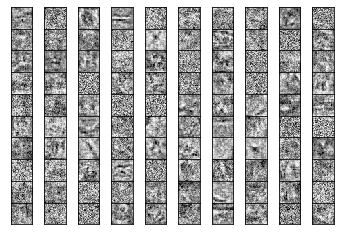

In [1]:
from keras.datasets import cifar10
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

input_size = 3072
batch_size = 100
epochs = 1000

model = Sequential([
    Dense(1024, input_dim=input_size),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(512),
    Activation('sigmoid'),
    Dense(classes),
    Activation('softmax')
])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), verbose=1)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import numpy
import random

fig = plt.figure()
outer_grid = gridspec.GridSpec(10, 10, wspace=0.0, hspace=0.0)

weights = model.layers[0].get_weights()

w = weights[0].T

for i, neuron in enumerate(random.sample(range(0, 1023), 100)):
    ax = plt.Subplot(fig, outer_grid[i])
    ax.imshow(numpy.mean(numpy.reshape(w[i], (32, 32, 3)), axis=2), cmap=cm.Greys_r)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

plt.show()
